# Pancreas endocrinogenesis E1415 - Waddington OT

### Imports and Settings

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
import cellrank as cr
from cellrank.external.kernels import WOTKernel
from cellrank.estimators import GPCCA
from tueplots import bundles
from tueplots import axes

In [13]:
plt.rcParams.update(**bundles.neurips2022(usetex=False, nrows=2), **axes.lines(base_width=0.5), **{"figure.dpi": 250})

scv.set_figure_params('scvelo', fontsize=20, color_map='viridis', dpi=400)  # for beautified visualization

cr.logging.print_versions()

cellrank==1.5.1+g16069e2 scanpy==1.9.1 anndata==0.8.0 numpy==1.23.1 numba==0.53.1 scipy==1.9.0 pandas==1.3.5 pygpcca==1.0.3 scikit-learn==1.1.2 statsmodels==0.13.2 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.5.2 seaborn==0.11.2


## Data Loading

In [15]:
adata = sc.read("../neural_ot/data/pancreas/1415_growth_rate.h5ad")

# Cellrank

### Transition probabilities

In [17]:
wk = WOTKernel(adata, time_key="day")
wk.compute_initial_growth_rates(organism="mouse", key_added="growth_rate_init")
wk.compute_transition_matrix(
    growth_iters=3, growth_rate_key="growth_rate_init", self_transitions="all", conn_weight=0.2
)

DEBUG: Converting `adata.obs['day']` to `categorical`
Computing `proliferation` scores
computing score 'proliferation_score'
    finished (0:00:00)
Computing `apoptosis` scores
computing score 'apoptosis_score'
    finished (0:00:00)
Computing transition matrix using Waddington optimal transport
Using `2000` HVGs from `adata.var['highly_variable']`
Using default cost matrices
Computing transport maps for `1` time pairs


  0%|          | 0/1 [00:00<?, ?time pair/s]

Using automatic `threshold=0.0005090943886898458`
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03)
    Finish (0:12:07)


WOTKernel

## Alternatively load precomputed adata

In [ ]:
adata = sc.read("adata_results/pancreas1415_wot.h5ad")

### Macrostate calculation

In [18]:
g = GPCCA(wk)

Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000087e+00 8.1692345804032927e-05 5.2761365117336200e-04 1.8874003878833269e-04 -7.2729626967531333e-05 3.0666832311401733e-04 -8.0714671776486828e-05 -1.4399044982251602e-04 -1.4045350027921738e-03 1.6511886660519314e-04 3.6751913132343977e-04 3.3467157753795771e-04 -4.9333424207960365e-04 2.1980268849392764e-03 1.4579311676736499e-03 2.2853882742409387e-03 -6.1884581059335863e-04 -6.8232396480215284e-05 2.8830457364333516e-05 1.1226212497732703e-03 
0.0000000000000000e+00 9.9956190935575984e-01 7.2441749543013465e-05 -7.5454557101863452e-04 1.7515336755408159e-04 -4.5912709245791576e-04 9.8321874584398351e-06 7.1739347777312269e-04 5.3725206086404590e-04 5.7552830478314009e-04 -1.2835339507478302e-04 4.7171028325318162e-04 3.0852088172650112e-04 -8.3552951558755421e-04 1.4018031725712571e-03 1.6782761363904760e-03 7.4661585007829926e-04 -6.0854481710337382e-04 -1.7228545059333472e-04 9.848413525885

Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:07)


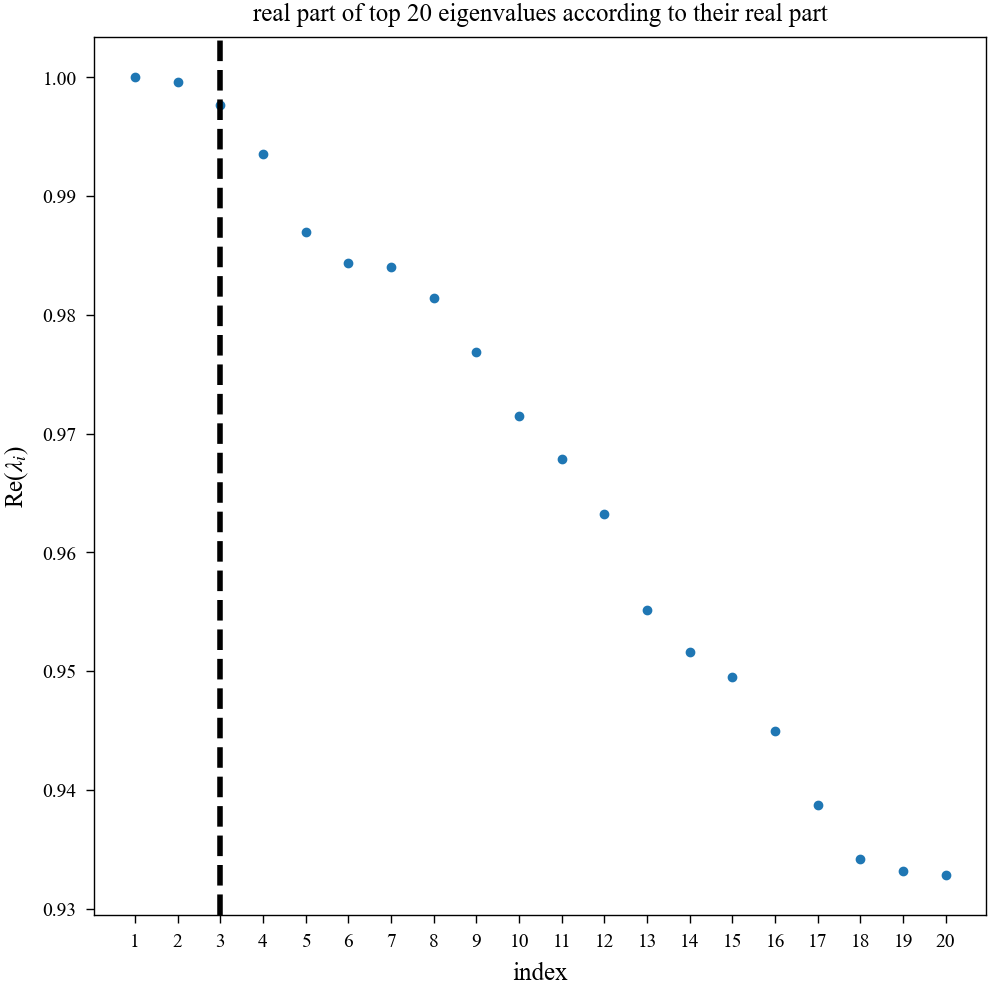

In [19]:
g.compute_schur(n_components=20)
g.plot_spectrum(real_only=True)

Computing `10` macrostates
DEBUG: Setting the macrostates using macrostates memberships
DEBUG: Raising an exception if there are less than `6` cells.
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:26)


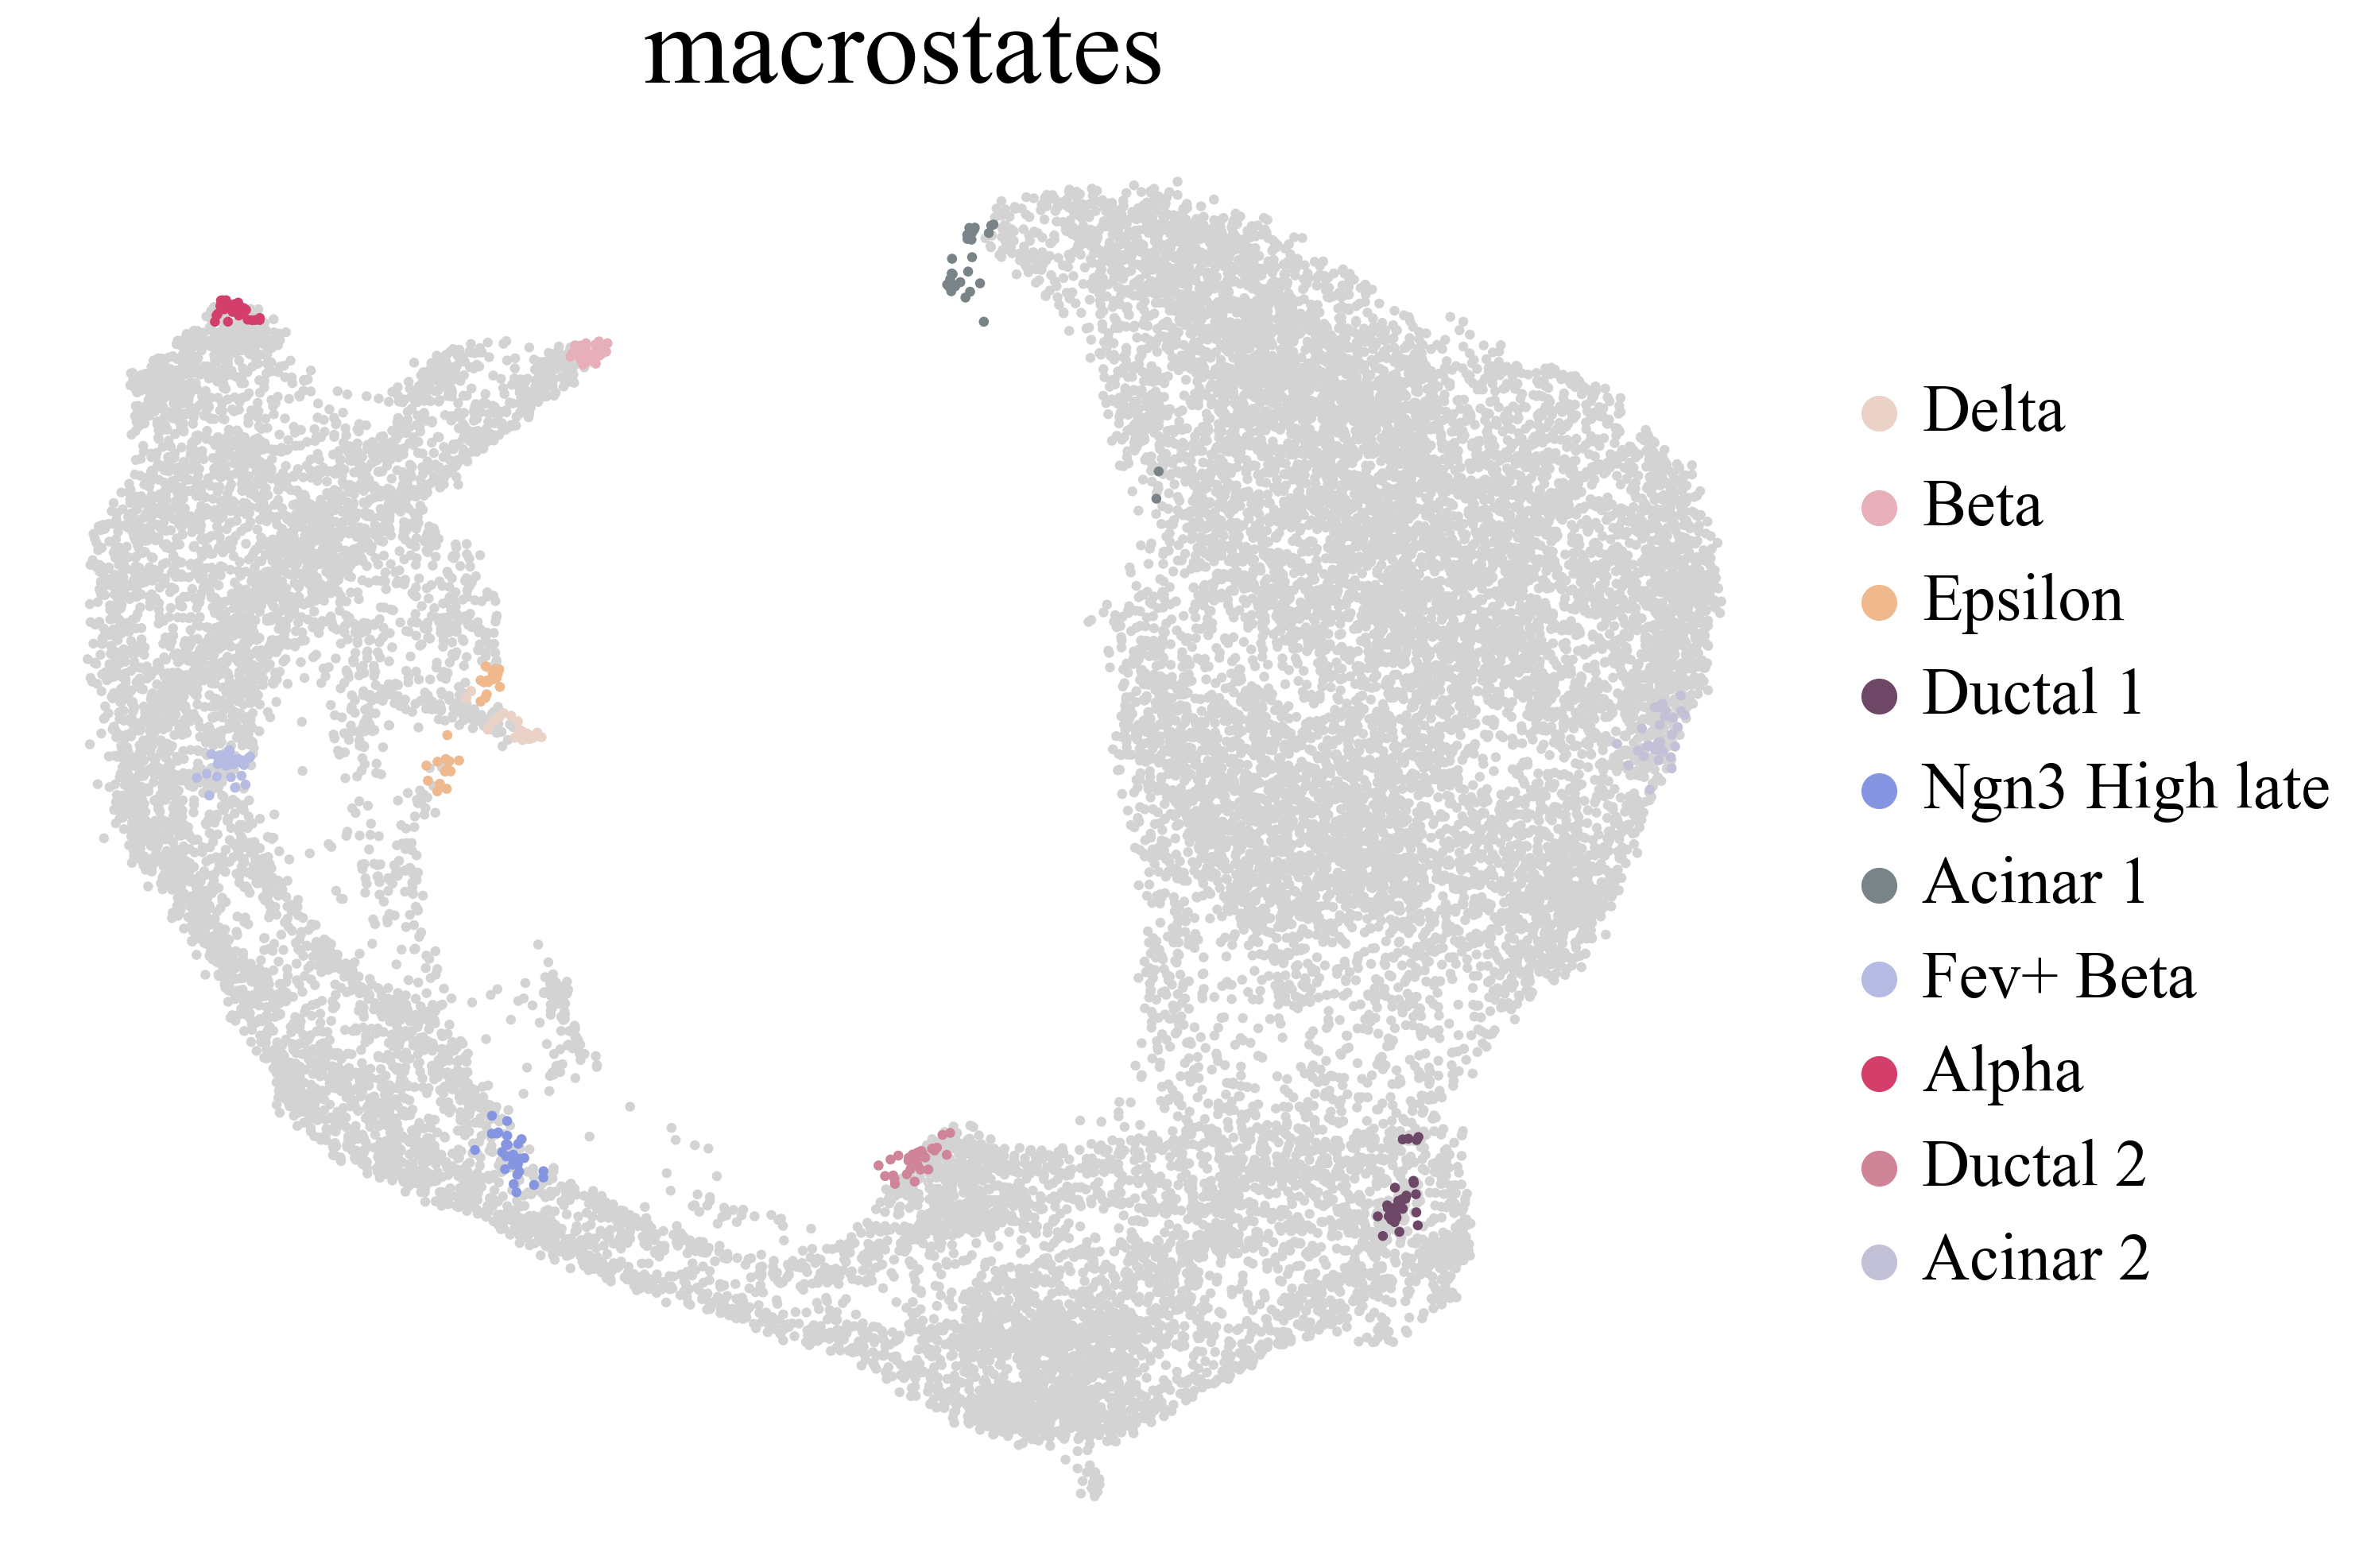

In [23]:
g.compute_macrostates(n_states=10, cluster_key="celltype")
scv.set_figure_params('scvelo', transparent=True, fontsize=20, color_map='viridis')
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250)

Computing `9` macrostates
DEBUG: Setting the macrostates using macrostates memberships
DEBUG: Raising an exception if there are less than `6` cells.
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:20)


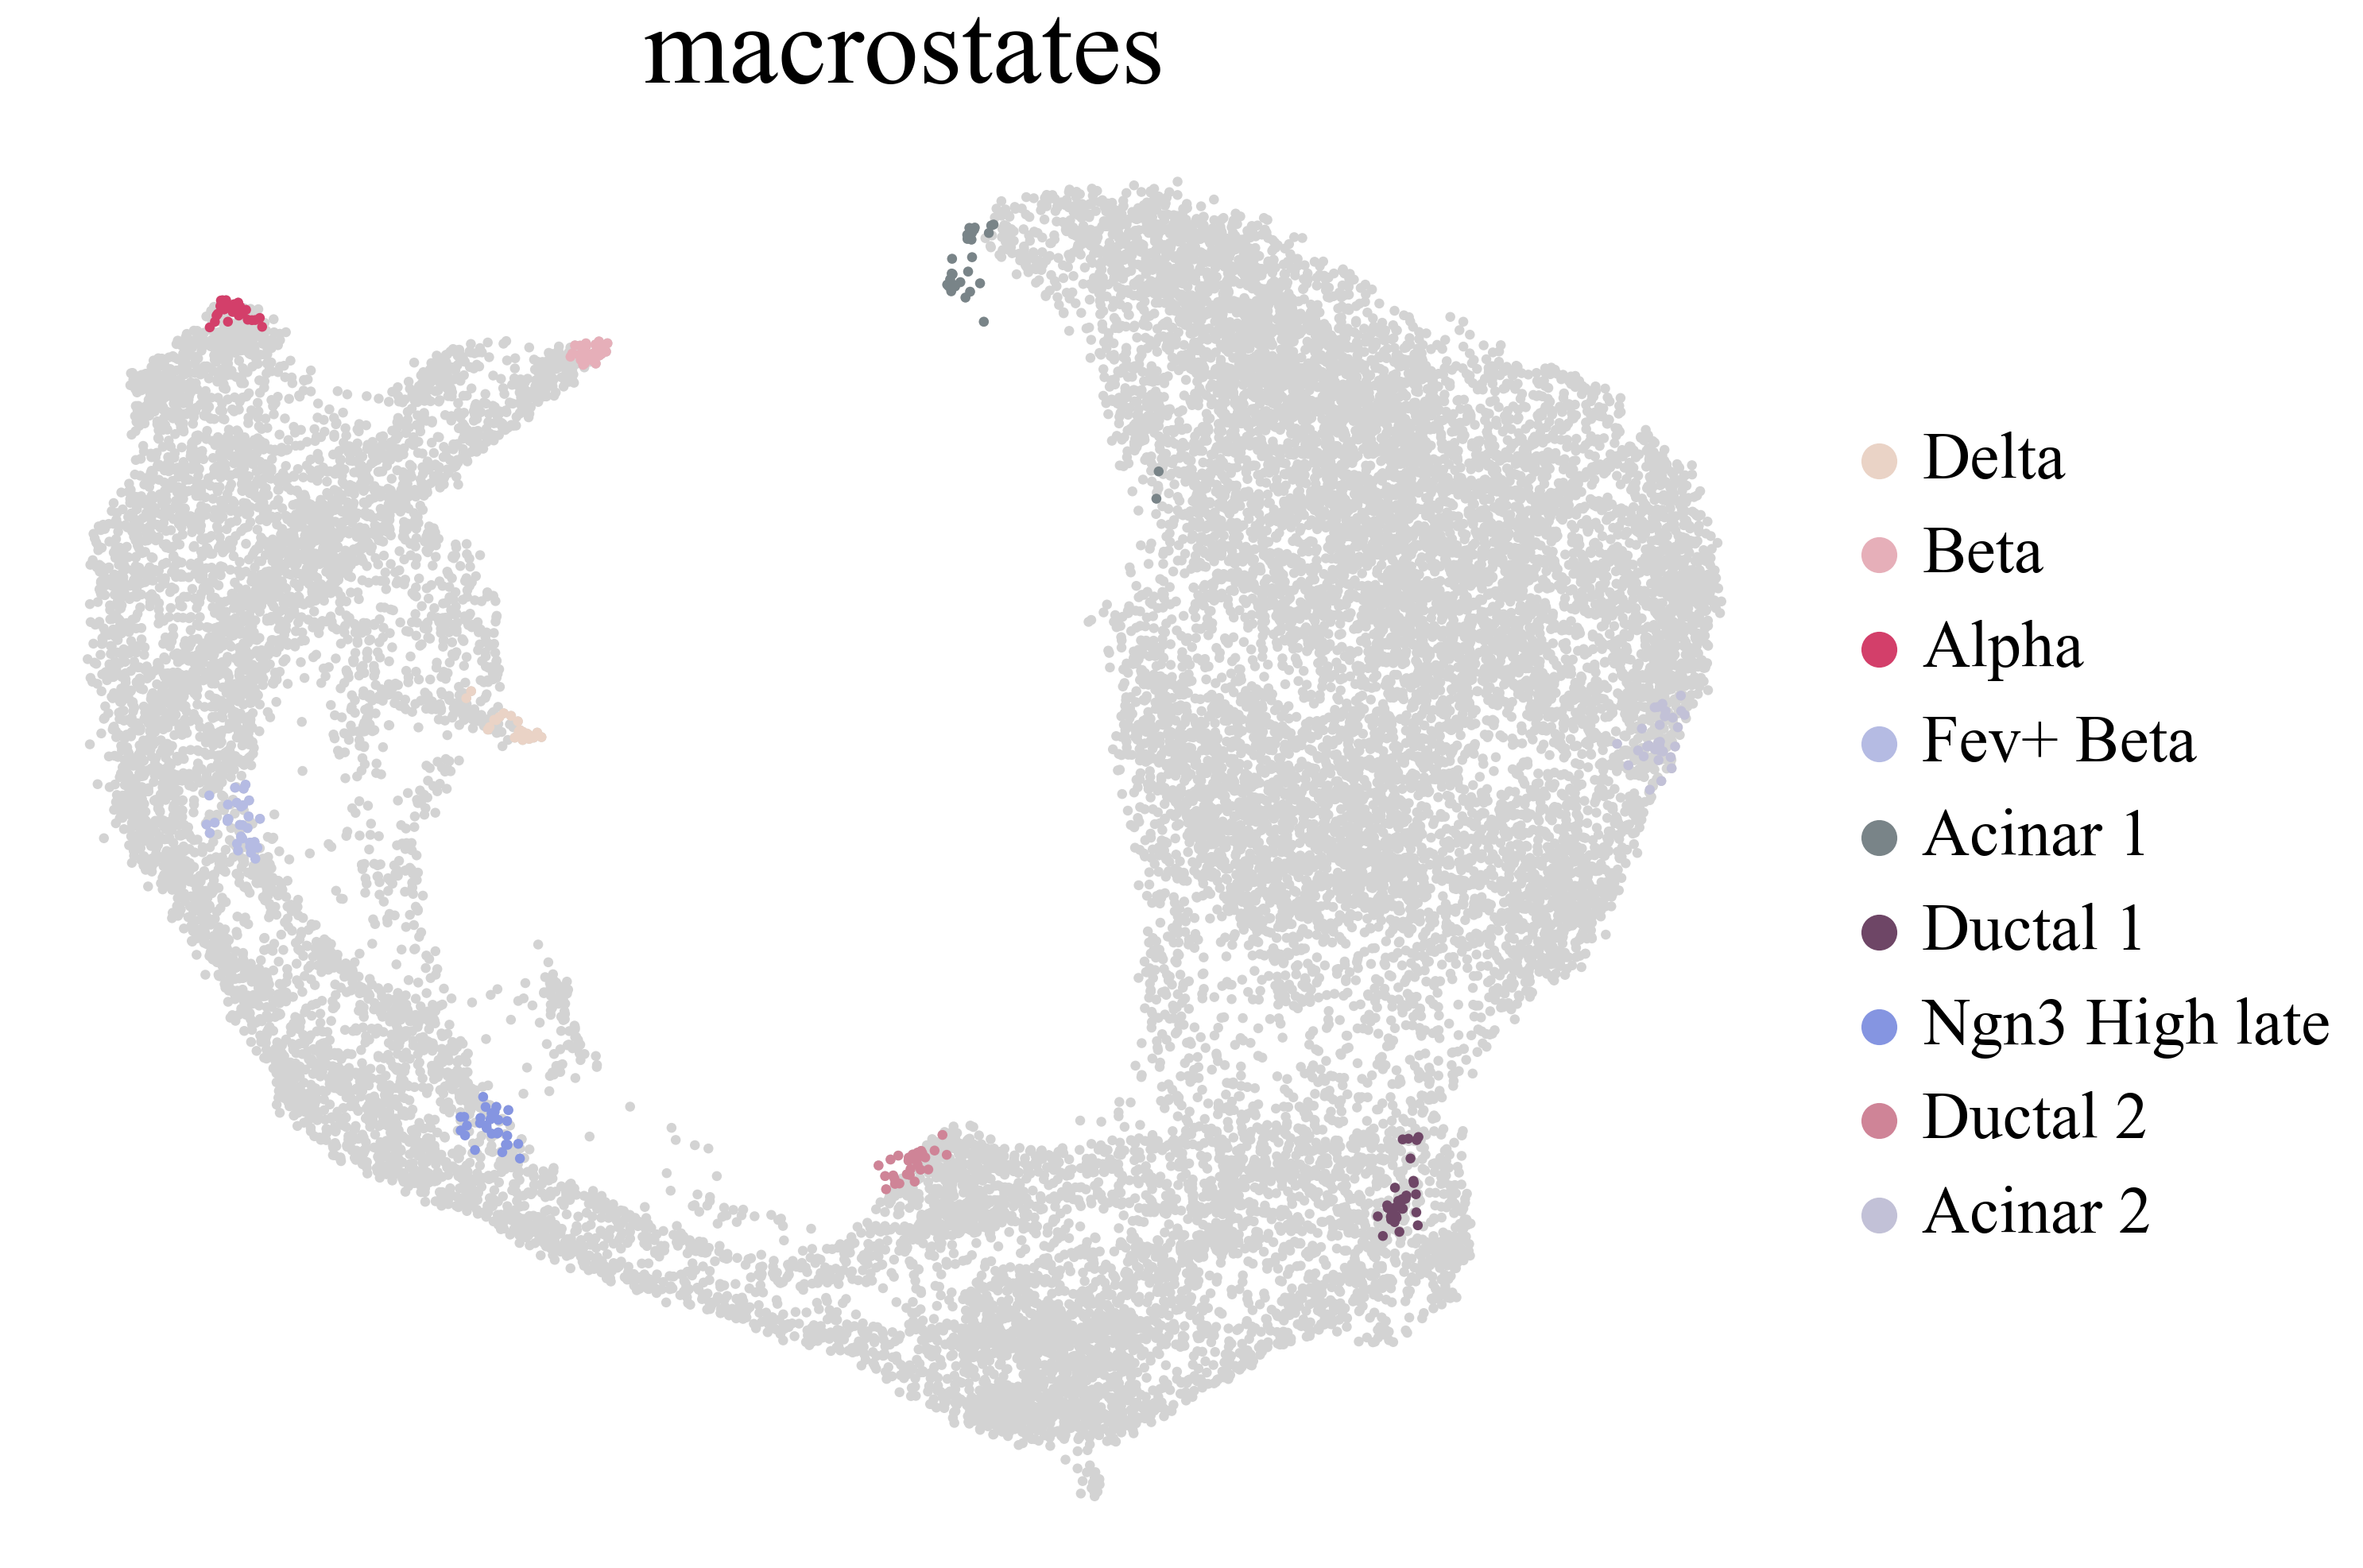

In [21]:
g.compute_macrostates(n_states=9, cluster_key="celltype")
scv.set_figure_params('scvelo', transparent=True, fontsize=20, color_map='viridis')
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250)

### Fate probabilities

DEBUG: Raising an exception if there are less than `6` cells.
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`
Computing absorption probabilities
DEBUG: Solving the linear system using `PETSc` solver `'gmres'` on `1` core(s) with ilu preconditioner and `tol=1e-12`


  0%|          | 0/8 [00:00<?, ?/s]

DEBUG: Calculating mean time to absorption to any absorbing state
DEBUG: Solving the linear system using `PETSc` solver `'gmres'` on `1` core(s) with ilu preconditioner and `tol=1e-12`


[0]PETSC ERROR: 

  0%|          | 0/1 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `adata.obsm['absorption_times_fwd']`
       `.absorption_probabilities`
       `.absorption_times`
    Finish (0:00:18)


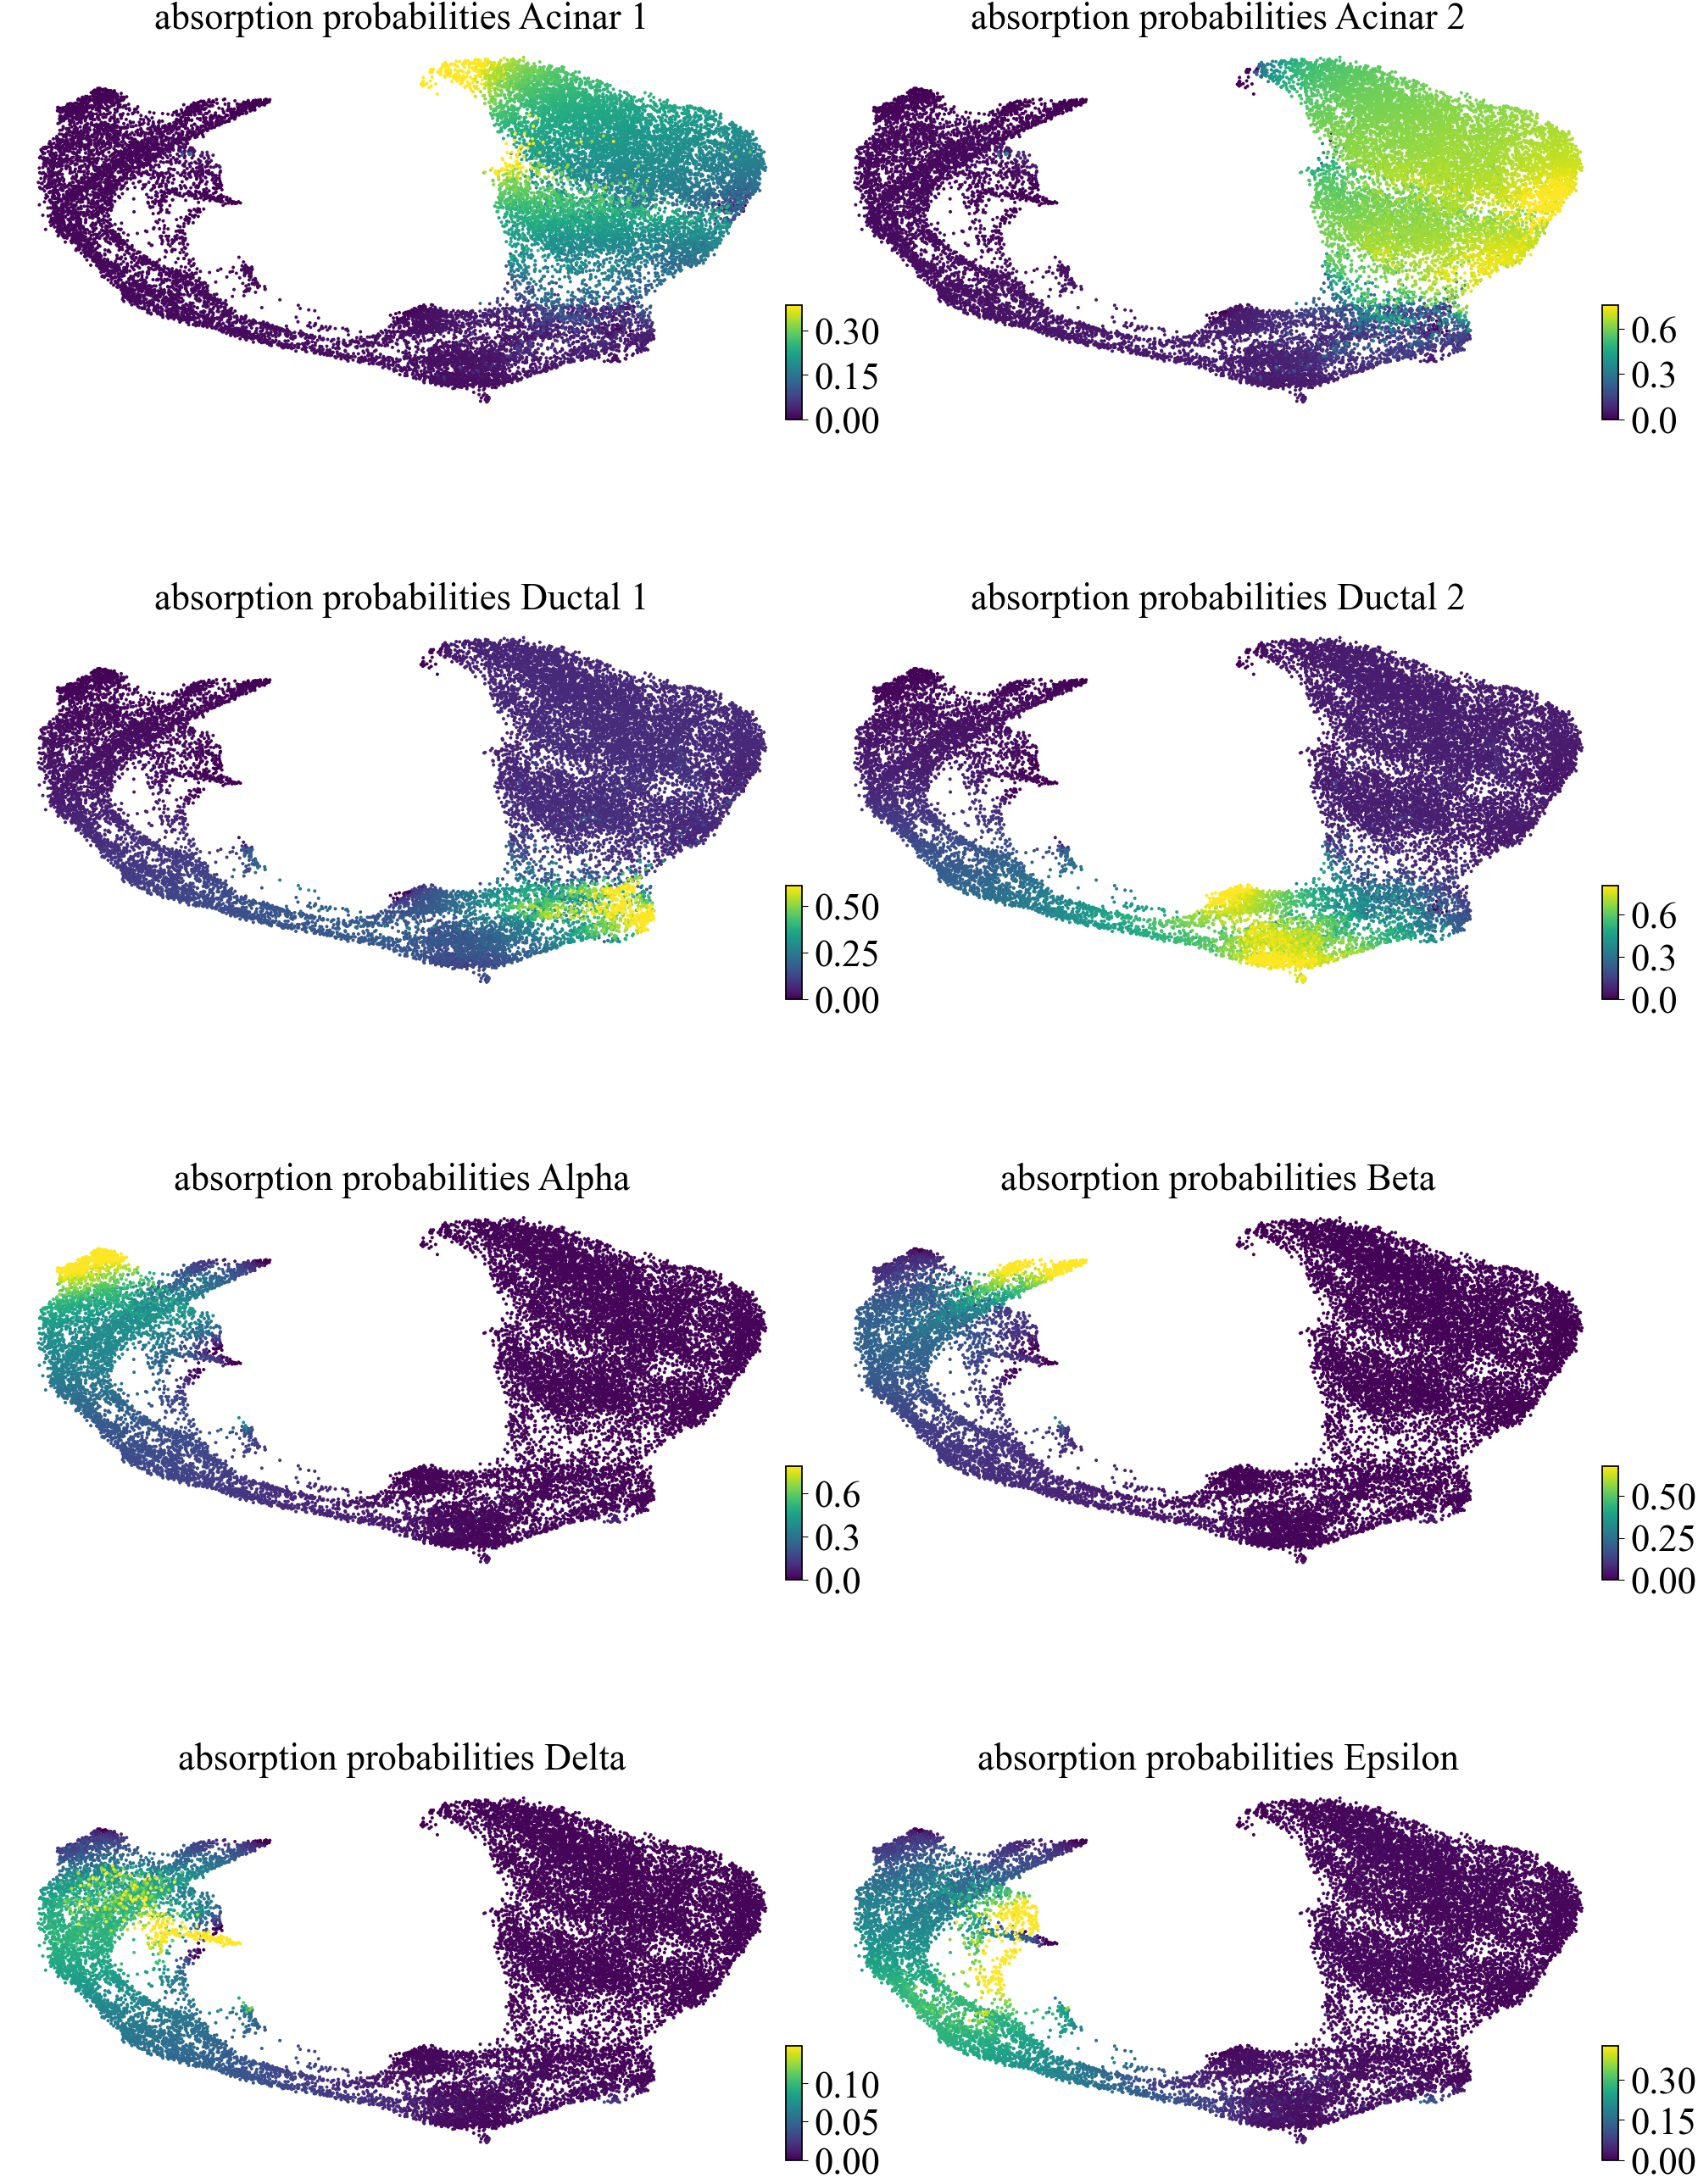

In [24]:
g.set_terminal_states_from_macrostates(
    [
        "Acinar_1", "Acinar_2", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", 
    ]
)
g.compute_absorption_probabilities(solver="gmres", use_petsc=True, tol=1e-12, preconditioner='ilu', time_to_absorption='all')
g.plot_absorption_probabilities(same_plot=False, basis="umap", perc=[0, 99], ncols=2)

DEBUG: Plotting in mode `'heatmap'`
DEBUG: Saving figure to `'figures/transprobs_wot.png'`


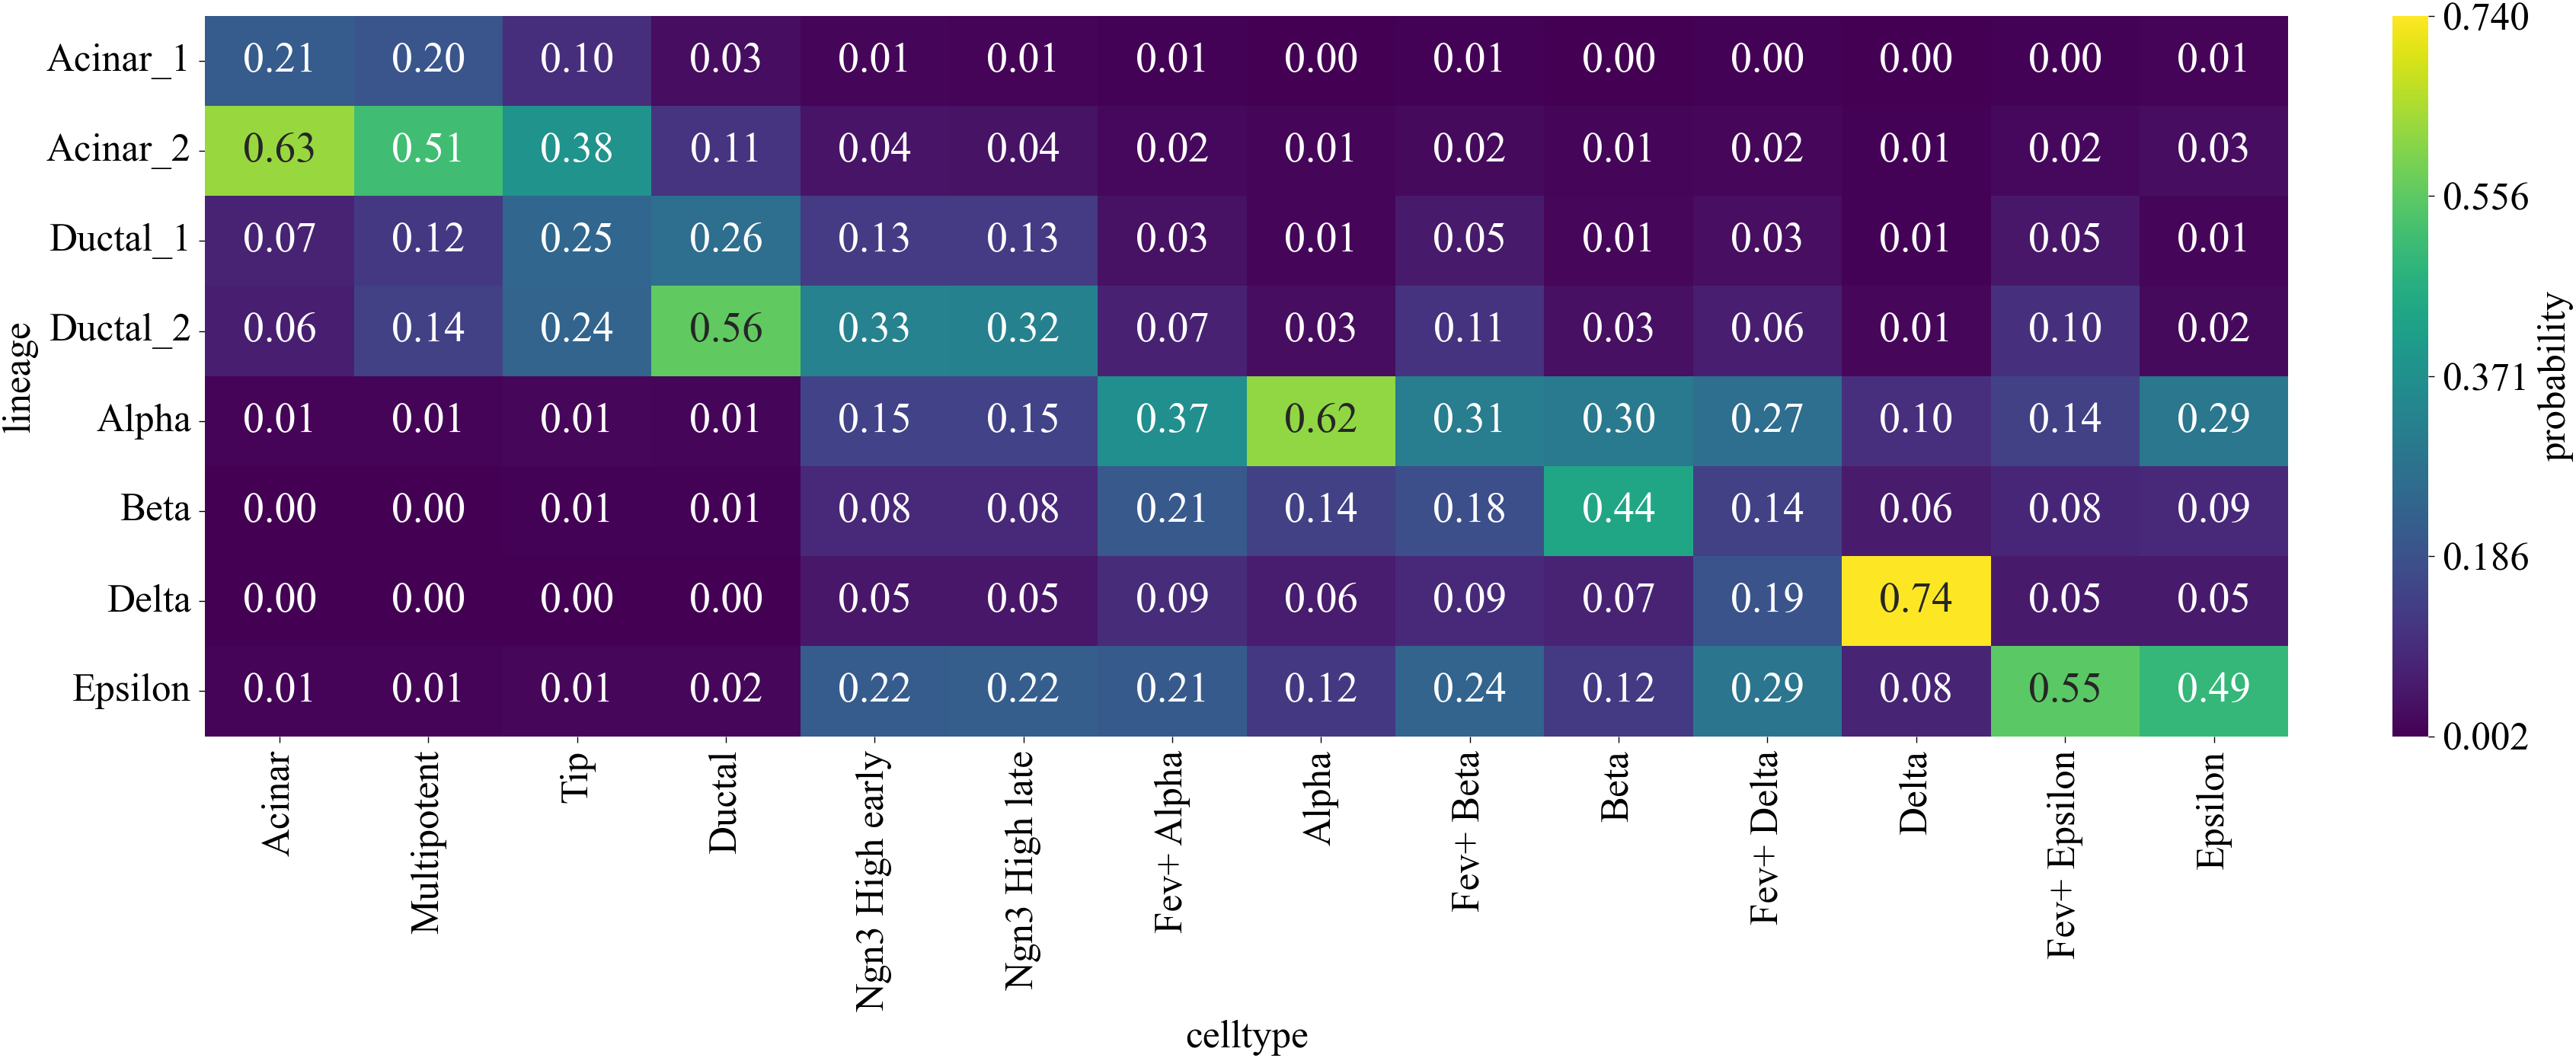

In [26]:
cr.pl.aggregate_absorption_probabilities(
    adata,
    mode='heatmap',
    lineages=["Acinar_1", "Acinar_2", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon"],
    cluster_key='celltype',
    clusters=['Acinar', 'Multipotent', 'Tip', 'Ductal', 'Ngn3 High early', 'Ngn3 High late', 'Fev+ Alpha', 'Alpha', 'Fev+ Beta', 'Beta', 'Fev+ Delta', 'Delta', 'Fev+ Epsilon', 'Epsilon'],
    figsize=(17, 7),
    title="",
    #save="transprobs_wot.png"
)